# LSTM

Ячейка LSTM

В LSTM слое (long short-term memory), кроме скрытого состояния $h$ между ячейками передаётся "состояние памяти" $c$. Размерность $H$ этого вектора совпадает с размерностью скрытого состояния $h$. Векторы $c$ регулируют какие признаки надо запомнить или забыть при передаче к следующей ячейке, что улучшает долгосрочную память.

Внутри LSTM-ячейки присутствует четыре линейных слоя с H нейронами. Три из них имеют сигмоидную активацию
$\sigma$ (на выходе вектор со значениями $[0,1]$) и один слой с гиперболическим тангенсом $tanh$: $[−1,1]$

$$
\left\{
\begin{array}{lcl}
\mathbf{h}^{(t)} &=&  \tanh\mathbf{c}^{(t)} \odot f\bigr(\mathbf{x}^{(t)},\,\mathbf{h}^{(t-1)}\bigr),\\[3mm]
\mathbf{c}^{(t)} &=& g\bigr(\mathbf{x}^{(t)},\,\mathbf{h}^{(t-1)},\, \mathbf{c}^{(t-1)}\bigr)
\end{array}
\right.
$$


<img src = https://qudata.com/ml/ru/im/rnn_02.png>


Скрытое состояние $h$ вычисляется аналогично RNN (но с сигмоидой вместо $tanh$, см. последний прямоугольник). После этого он умножается на $tanh(c)$. Гиперболический тангенс берётся независимо от каждой компоненты вектора $c$, делая при умножении (без свёртки!) соответствующую компоненту $h$ положительной или отрицательной (или, возможно, её зануляя, если данная компонента не важна для дальнейшего).
Перед этим вычислением происходит изменение значения входящего в ячейку вектора памяти $c^{(t−1)}$. Сначала
$x^{(t)},h^{(t−1)}$ попадают в полносвязный слой Forget с сигмоидой (гейт забывания). Размерность выхода этого слоя равна $H$ (как у $h$ и $c$). Этот вектор без свёртки умножается на компоненты предыдущего вектора памяти $c^{(t−1)}$. Предполагается, что при умножении какие-то признаки в $c^{(t−1)}$ забываются (если их умножили на 0), а какие-то двигаются дальше (если их умножили на 1). Пример забывания: "Он взял джин, а она взяла мартини" ("взяла" после "она" может забыть про "он"). Аналогично точка, как признак конца предложения, должна обнулить существенную часть компонент вектора памяти $c(t)$.

Похожим образом работают следующий гейт, реализующие запоминание. Те фичи которые необходимо запомнить добавляются в вектор $c$. Слой с $tanh [-1...1]$ формирует "фичи-кандидаты", а слой с сигмоидом $[0...1]$ усиливает или ослабляет роль запоминаемой фичи. Аналитически вычисления в LSTM ячейке выглядят следующим образом:

$$
\left\{
\begin{array}{lclclcl}
\mathbf{F} &=& ~~~~~~\sigma(\mathbf{x}^{(t)}\, \mathbf{W}_{f} &+& \mathbf{h}^{(t-1)}\, \mathbf{H}_{f} &+& \mathbf{b}_f),\\
\mathbf{I} &=& ~~~~~~\sigma(\mathbf{x}^{(t)}\, \mathbf{W}_{i} &+& \mathbf{h}^{(t-1)}\, \mathbf{H}_{i} &+& \mathbf{b}_i),\\
\mathbf{R} &=& \text{tanh}(\mathbf{x}^{(t)}\, \mathbf{W}_{r} &+& \mathbf{h}^{(t-1)}\, \mathbf{H}_{r} &+& \mathbf{b}_r),\\
\mathbf{O} &=& ~~~~~~\sigma(\mathbf{x}^{(t)}\, \mathbf{W}_{o} &+& \mathbf{h}^{(t-1)}\, \mathbf{H}_{o} &+& \mathbf{b}_o),
\end{array}
\right.
~~~~~~~~~~~~~~~~~~
\left\{
\begin{array}{lcl}
\mathbf{c}^{(t)} &=& \mathbf{F} \odot \mathbf{c}^{(t-1)} +  \mathbf{R}\odot \mathbf{I},\\[2mm]
\mathbf{h}^{(t)} &=& \tanh\bigr(\mathbf{c}^{(t)}\bigr) \odot \mathbf{O}.
\end{array}
\right.
$$

Размерности матриц для $E = dim(x), H = dim(h), dim(c)$ равны:
$$
\mathbf{W}_{i}, ~\mathbf{W}_{f}, ~\mathbf{W}_{r}, ~\mathbf{W}_{o}:~~~\mathrm{(E, H)};~~~~~~~~~~
\mathbf{H}_{i}, ~\mathbf{H}_{f}, ~\mathbf{H}_{r}, ~\mathbf{H}_{o}:~~~\mathrm{(H, H)};~~~~~~~~~~
\mathbf{b}_i, ~\mathbf{b}_f,     ~\mathbf{b}_r,   ~\mathbf{b}_o: ~~~~\mathrm{(1, H)}.
$$

В PyTorch LSTM-сеть реализует класс torch.nn.LSTM. В отличии torch.nn.RNN при прямом проходе возвращается три тензора: $Y, Hd, Cn$ (скрытое состояние и вектор памяти имеют одинаковую размерность).

Статья на Хабр: https://habr.com/ru/companies/wunderfund/articles/331310/

Долгая краткосрочная память (Long short-term memory; LSTM) – особая разновидность архитектуры рекуррентных нейронных сетей, способная к обучению долговременным зависимостям. Они были представлены Зеппом Хохрайтер и Юргеном Шмидхубером (Jürgen Schmidhuber) в 1997 году, а затем усовершенствованы и популярно изложены в работах многих других исследователей. Они прекрасно решают целый ряд разнообразных задач и в настоящее время широко используются.

LSTM разработаны специально, чтобы избежать проблемы долговременной зависимости. Запоминание информации на долгие периоды времени – это их обычное поведение, а не что-то, чему они с трудом пытаются обучиться.

Любая рекуррентная нейронная сеть имеет форму цепочки повторяющихся модулей нейронной сети. В обычной RNN структура одного такого модуля очень проста, например, он может представлять собой один слой с функцией активации tanh (гиперболический тангенс).

<img src = 'https://habrastorage.org/r/w1560/web/47d/ee6/2c3/47dee62c3af8498c946befa1f3330d90.png'>

Повторяющийся модуль в стандартной RNN состоит из одного слоя.

Структура LSTM также напоминает цепочку, но модули выглядят иначе. Вместо одного слоя нейронной сети они содержат целых четыре, и эти слои взаимодействуют особенным образом.

<img src = 'https://habrastorage.org/r/w1560/web/67b/04f/73b/67b04f73b4c34ba38edfa207e09de07c.png'>

Повторяющийся модель в LSTM сети состоит из четырех взаимодействующих слоев.

Ключевой компонент LSTM – это состояние ячейки (cell state) – горизонтальная линия, проходящая по верхней части схемы.

Состояние ячейки напоминает конвейерную ленту. Она проходит напрямую через всю цепочку, участвуя лишь в нескольких линейных преобразованиях. Информация может легко течь по ней, не подвергаясь изменениям.

<img src = 'https://habrastorage.org/r/w1560/web/db4/e23/6e1/db4e236e1d834c96949f17e94e8900c7.png'>


Тем не менее, LSTM может удалять информацию из состояния ячейки; этот процесс регулируется структурами, называемыми фильтрами (gates).

Фильтры позволяют пропускать информацию на основании некоторых условий. Они состоят из слоя сигмоидальной нейронной сети и операции поточечного умножения.

<img src = 'https://habrastorage.org/r/w1560/web/c79/2d4/f1b/c792d4f1bc1e4bb9829b6cbb41cdec59.png'>

Сигмоидальный слой возвращает числа от нуля до единицы, которые обозначают, какую долю каждого блока информации следует пропустить дальше по сети. Ноль в данном случае означает “не пропускать ничего”, единица – “пропустить все”.

В LSTM три таких фильтра, позволяющих защищать и контролировать состояние ячейки.

Первый шаг в LSTM – определить, какую информацию можно выбросить из состояния ячейки. Это решение принимает сигмоидальный слой, называемый “слоем фильтра забывания” (forget gate layer). Он смотрит на $h_{t-1}$ и $x_t$ и возвращает число от 0 до 1 для каждого числа из состояния ячейки $C_{t-1}$. 1 означает “полностью сохранить”, а 0 – “полностью выбросить”.

Вернемся к нашему примеру – языковой модели, предсказывающей следующее слово на основании всех предыдущих. В этом случае состояние ячейки должно сохранить существительного, чтобы затем использовать местоимения соответствующего рода. Когда мы видим новое существительное, мы можем забыть род старого.

<img src = 'https://habrastorage.org/r/w1560/web/a5f/31a/104/a5f31a104b184217aca105de9ab6d320.png'>

Следующий шаг – решить, какая новая информация будет храниться в состоянии ячейки. Этот этап состоит из двух частей. Сначала сигмоидальный слой под названием “слой входного фильтра” (input layer gate) определяет, какие значения следует обновить. Затем tanh-слой строит вектор новых значений-кандидатов $\tilde{C}_t$, которые можно добавить в состояние ячейки.

В нашем примере с языковой моделью на этом шаге мы хотим добавить род нового существительного, заменив при этом старый.

<img src = 'https://habrastorage.org/r/w1560/web/248/bf4/a75/248bf4a75ab74bf180b9c0e2e2cc5a58.png'>

Настало время заменить старое состояние ячейки $C_{t-1}$ на новое состояние $C_t$. Что нам нужно делать — мы уже решили на предыдущих шагах, остается только выполнить это.

Мы умножаем старое состояние на $f_t$, забывая то, что мы решили забыть. Затем прибавляем $i_t*\tilde{C}_t$. Это новые значения-кандидаты, умноженные на $t$ – на сколько мы хотим обновить каждое из значений состояния.

В случае нашей языковой модели это тот момент, когда мы выбрасываем информацию о роде старого существительного и добавляем новую информацию.

<img src = 'https://habrastorage.org/r/w1560/web/30e/ffa/7f9/30effa7f98274deaa65cf2e293f18365.png'>

Наконец, нужно решить, какую информацию мы хотим получать на выходе. Выходные данные будут основаны на нашем состоянии ячейки, к ним будут применены некоторые фильтры. Сначала мы применяем сигмоидальный слой, который решает, какую информацию из состояния ячейки мы будем выводить. Затем значения состояния ячейки проходят через tanh-слой, чтобы получить на выходе значения из диапазона от -1 до 1, и перемножаются с выходными значениями сигмоидального слоя, что позволяет выводить только требуемую информацию.

Мы, возможно, захотим, чтобы наша языковая модель, обнаружив существительное, выводила информацию, важную для идущего после него глагола. Например, она может выводить, находится существительное в единственном или множественном числе, чтобы правильно определить форму последующего глагола.

<img src = 'https://habrastorage.org/r/w1560/web/16d/5b5/783/16d5b5783ba34244afcf0f240133fb28.png'>

# Предсказание количества заболеваний СOVID-19  при помощи архитектуры LSTM

In [1]:
!pip install -Uq watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.5 MB/s eta 0:00:00


In [2]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy : 1.23.5
pandas: 1.5.3
torch : 2.1.0+cu118



In [3]:
import torch

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

## Скачивание и обработка данных

Набор данных предоставлен в открытом пользовании Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE): [доступно на GitHub](https://github.com/CSSEGISandData/COVID-19).

Будем использовать только подтверждённые случаи.

In [ ]:
# !wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

In [4]:
!gdown --id 1AsfdLrGESCQnRW5rbMz56A1KBc3Fe5aV

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1AsfdLrGESCQnRW5rbMz56A1KBc3Fe5aV
To: /content/time_series_19-covid-Confirmed.csv
100% 19.2k/19.2k [00:00<00:00, 44.0MB/s]


Прочитаем файл 'time_series_19-covid-Confirmed.csv' и выведем его начало на экран.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/DeepLearning/time_series_19-covid-Confirmed.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,989,989,989,989,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,399,399,399,400,400,410,410,411,413,414
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,573,575,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,294,294,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


Отметим два момента:

- данные содержать область, страну, широту и долготу, но нам эта информация не понадобится;
- количество случаем суммируется, то есть происходит накопление с учётом предыдущих значений, это нам так же не нужно.

In [7]:
df = df.iloc[:,4:]

In [8]:
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20
0,1,9,15,39,60,70,106,152,200,237,...,989,989,989,989,989,989,990,990,990,990
1,14,22,36,41,68,80,91,111,114,139,...,399,399,399,400,400,410,410,411,413,414
2,6,9,27,57,75,110,132,147,182,211,...,573,575,576,576,576,576,576,576,576,576
3,1,5,10,18,35,59,80,84,101,120,...,293,293,293,294,294,296,296,296,296,296
4,0,2,2,4,7,14,19,24,26,29,...,91,91,91,91,91,91,91,91,91,91


Сделаем проверку на пропущенные значения:

In [10]:
df.isnull().sum().sum()

0

Теперь получим общее количество случаев за день и выведем на экран график:

In [11]:
daily_cases = df.sum(axis=0)
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases.head()

2020-01-22     555
2020-01-23     653
2020-01-24     941
2020-01-25    1434
2020-01-26    2118
dtype: int64

Text(0.5, 1.0, 'Cumulative daily cases')

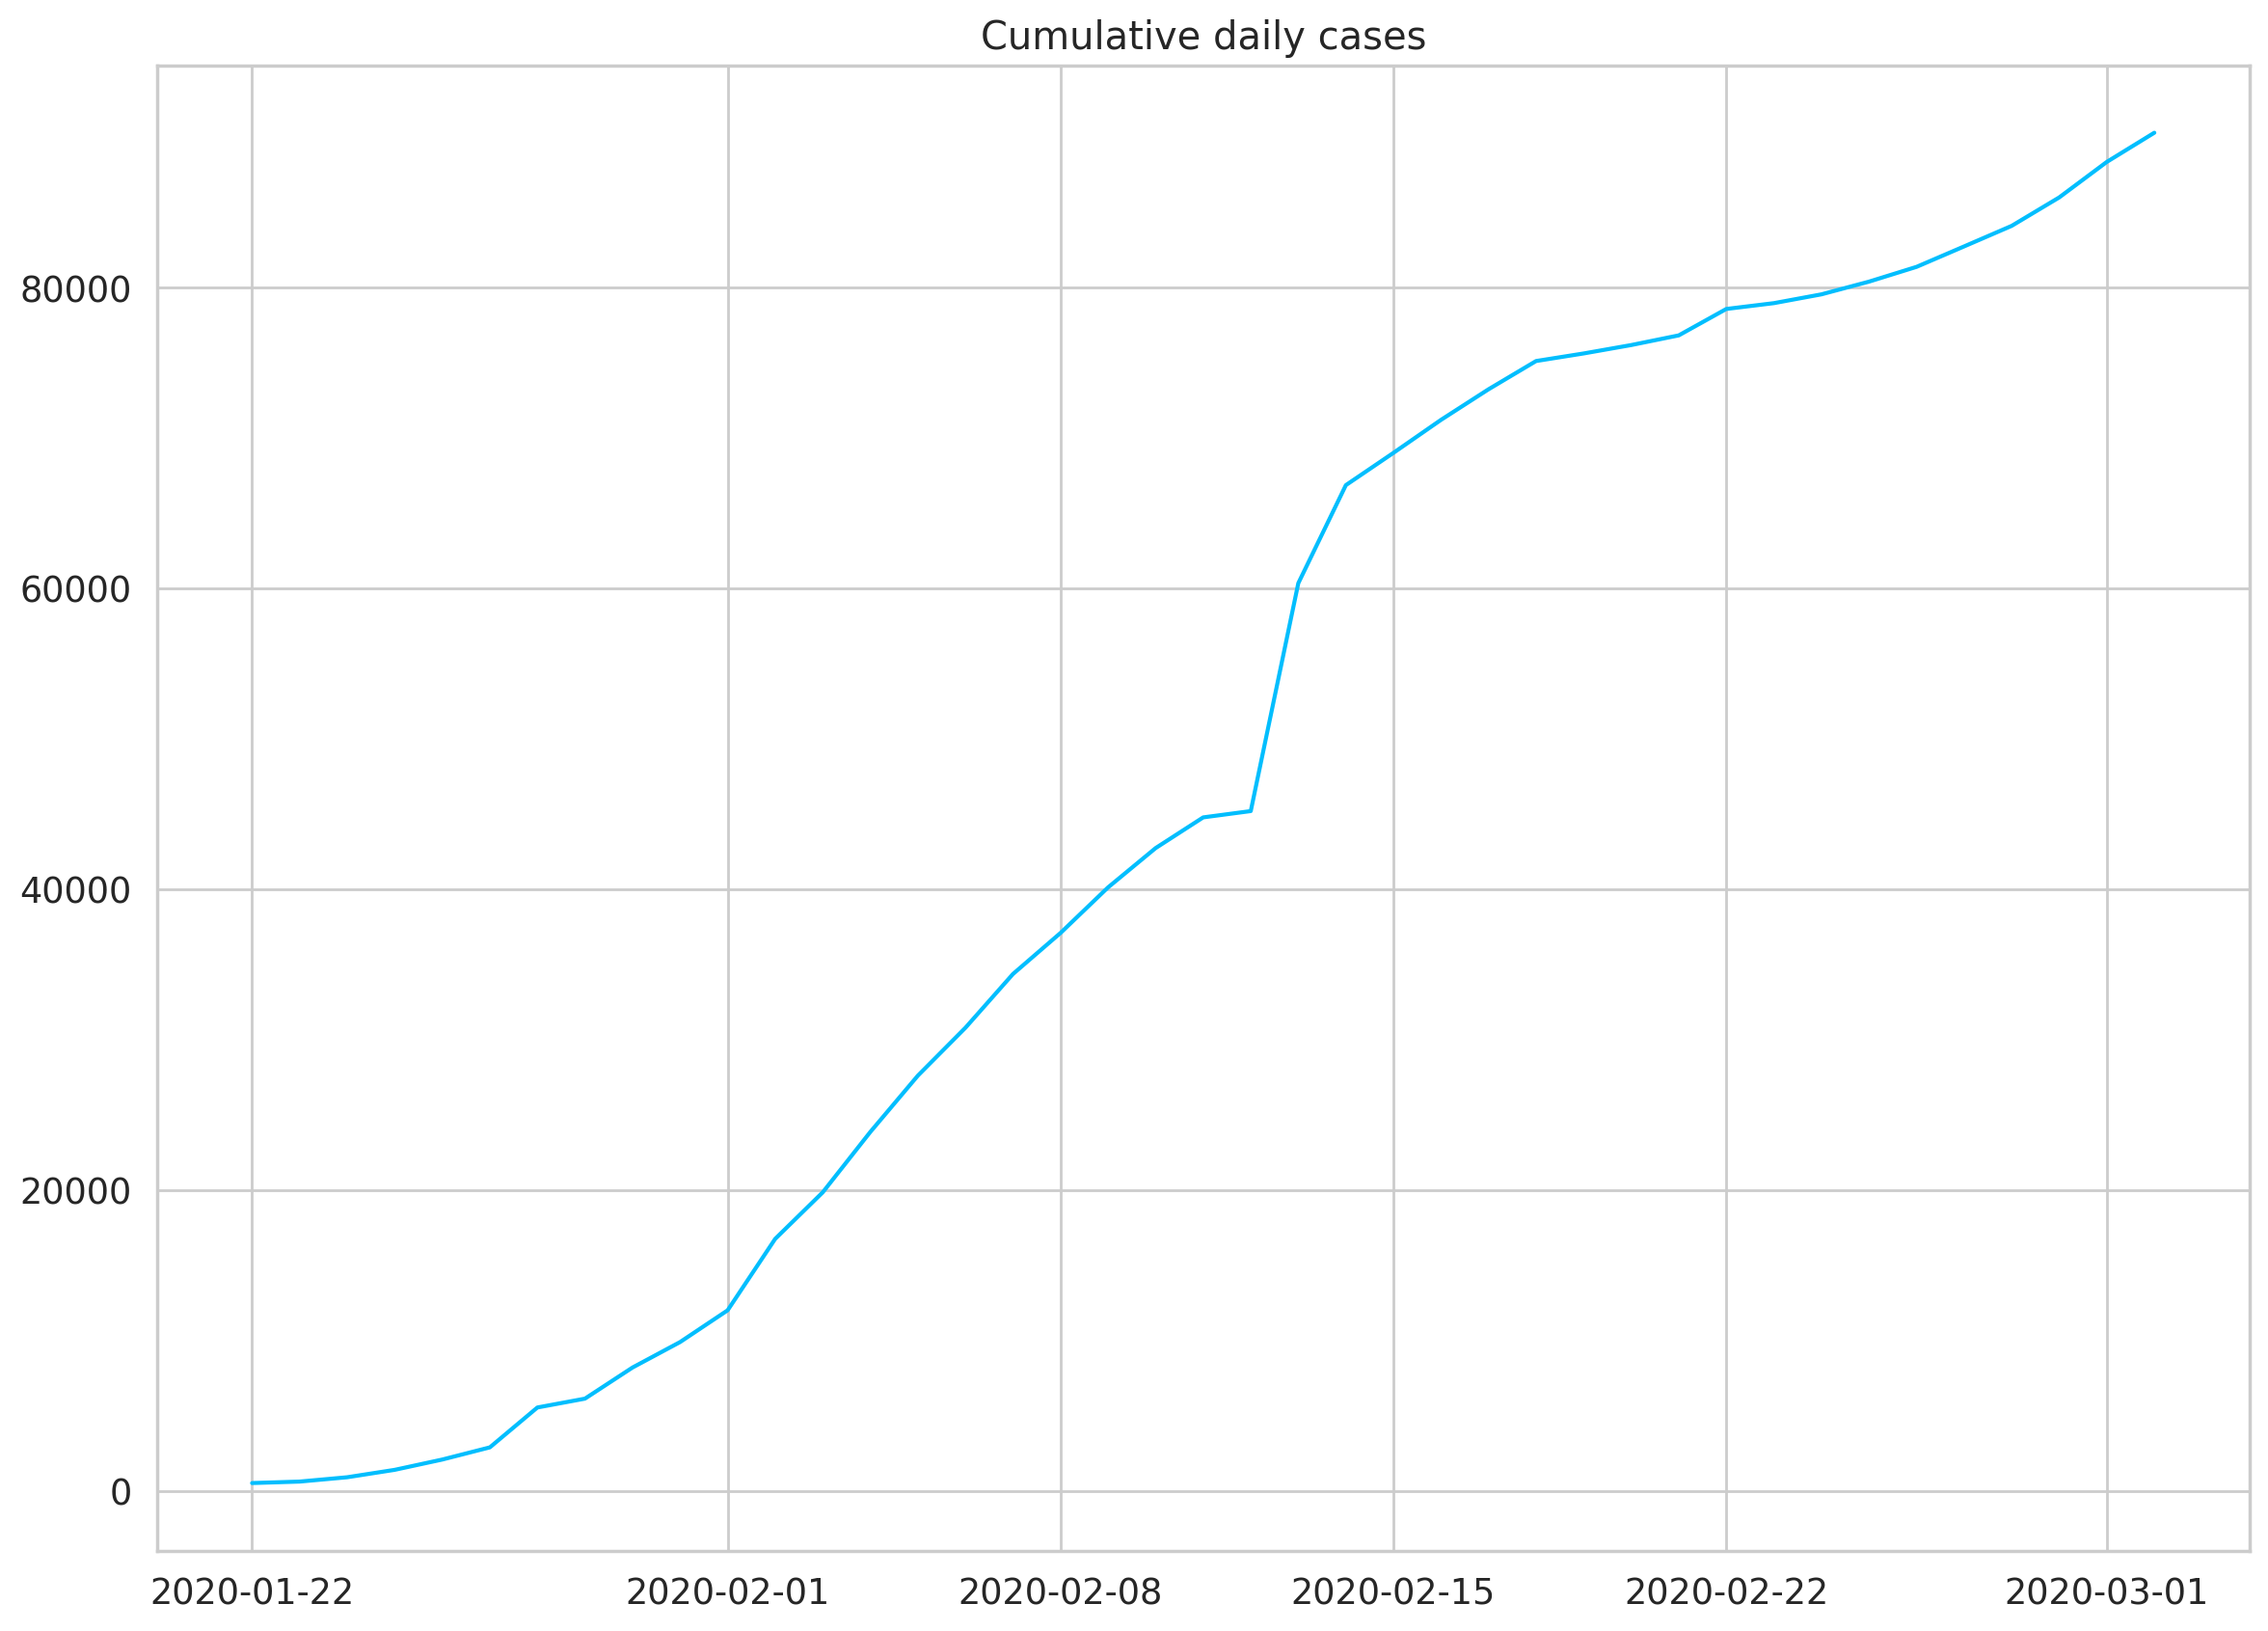

In [14]:
plt.plot(daily_cases)
plt.title("Cumulative daily cases")

Чтобы получить значение для каждого дня, вычтем из каждого полученного значения предыдущее и снова изобразим в виде графика:

In [15]:
daily_cases = daily_cases.diff().fillna(daily_cases[0]).astype(np.int64)
daily_cases.head()

2020-01-22    555
2020-01-23     98
2020-01-24    288
2020-01-25    493
2020-01-26    684
dtype: int64

Text(0.5, 1.0, 'Daily cases')

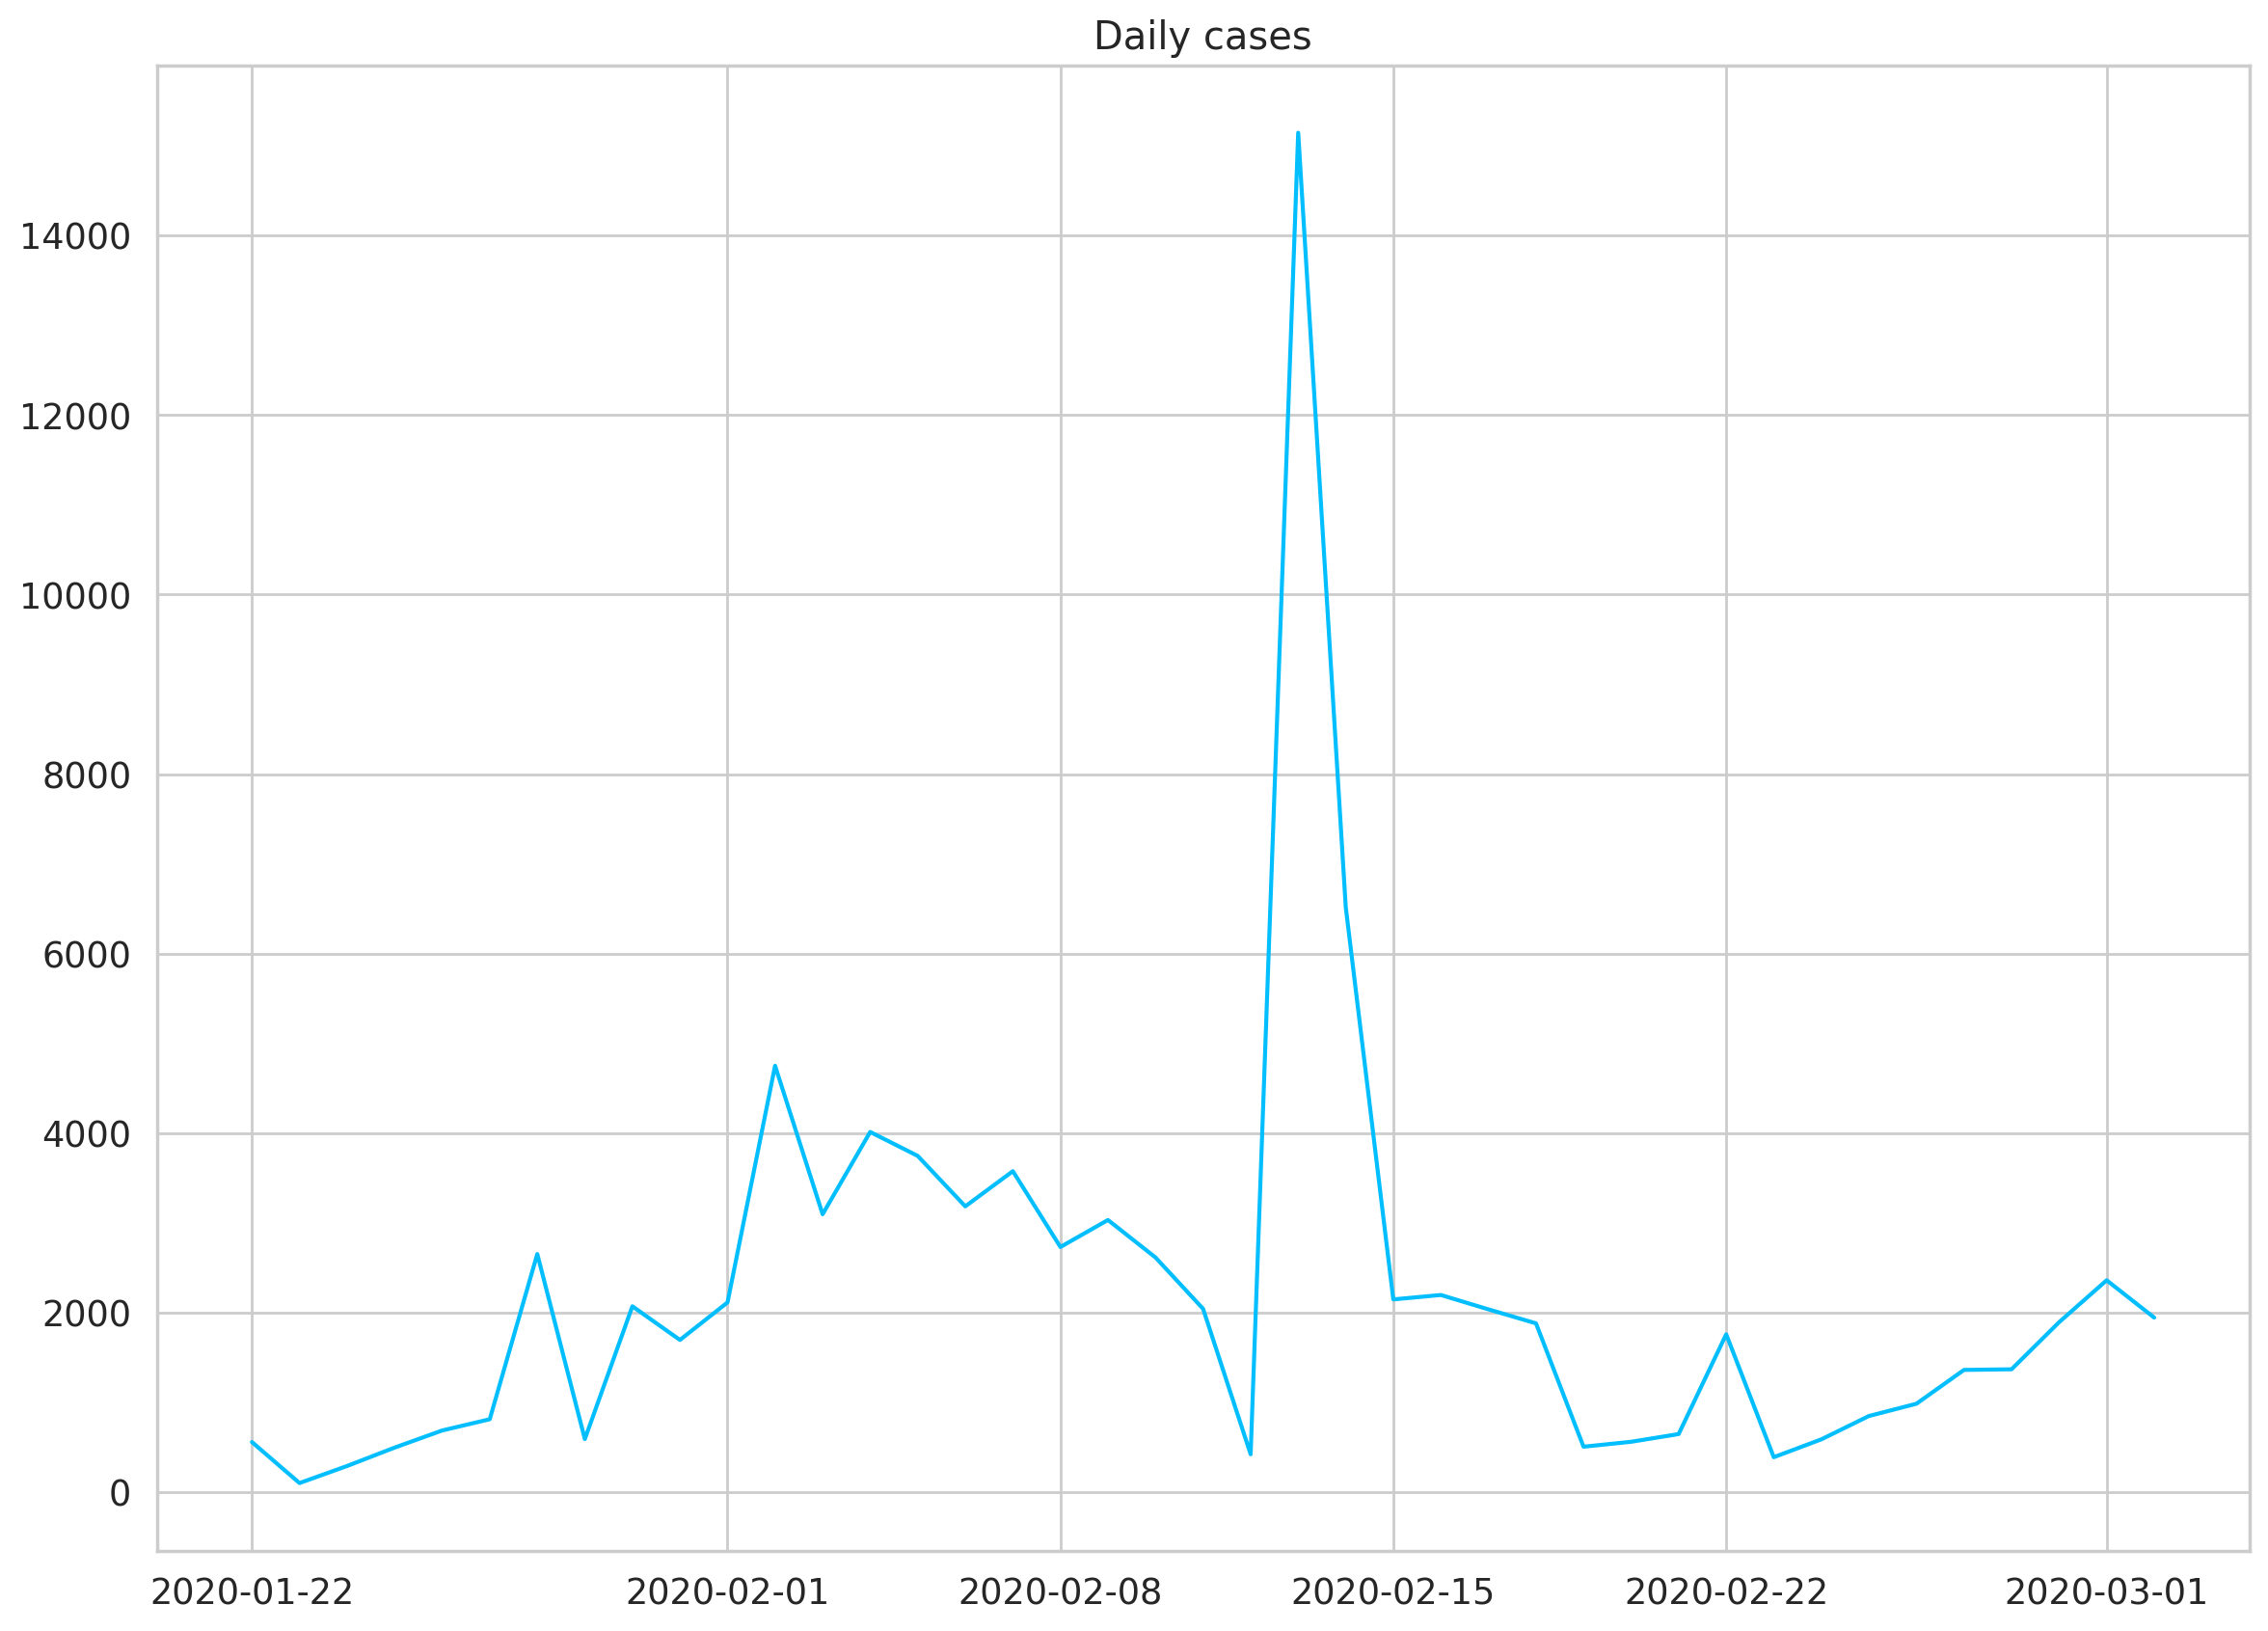

In [16]:
plt.plot(daily_cases)
plt.title("Daily cases")

Пик в середине рассматриваемого периода времени связан с изменением критериев тестирования в Китае. Это будет одним из "вызовов" для нашей модели. Проверим, сколько в итоге получилось дней в наборе данных:

In [17]:
daily_cases.shape

(41,)

Итого - 41 день.

Будем использовать первые 27 дней для тренировочного множества и 14 - для тестового.

In [18]:
test_data_size = 27

train_data = daily_cases[:test_data_size]
test_data = daily_cases[test_data_size:]

print(train_data.shape)
print(test_data.shape)

(27,)
(14,)


Для ускорения обучения и проверки модели переведём все данные в интервал $(0;1)$ при помощи `MinMaxScaler` из бибилотеки scikit-learn:

In [19]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(train_data, axis=1))

train_data = scaler.transform(np.expand_dims(train_data, axis=1))

test_data = scaler.transform(np.expand_dims(test_data, axis=1))

Зададим функцию, которая сделает последовательности из данных определённой длины:

In [20]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

Разобъём тренировочное множество на последовательности длины 5:

In [21]:
seq_length = 5
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

Проверим, что каждый из тренировоных примеров содержит 5 значений для даты и метку:

In [22]:
X_train.shape

torch.Size([21, 5, 1])

In [23]:
X_train[:2]

tensor([[[0.0304],
         [0.0000],
         [0.0126],
         [0.0262],
         [0.0389]],

        [[0.0000],
         [0.0126],
         [0.0262],
         [0.0389],
         [0.0472]]])

In [24]:
y_train.shape

torch.Size([21, 1])

In [25]:
y_train[:2]

tensor([[0.0472],
        [0.1696]])

In [26]:
train_data[:10]

array([[0.03036545],
       [0.        ],
       [0.01262458],
       [0.02624585],
       [0.03893688],
       [0.04724252],
       [0.16963455],
       [0.03255814],
       [0.13089701],
       [0.10598007]])

Создадим класс для модели как наследник от `torch.nn.Module`. Он будет называться `CoronaVirusPredictor` и содержать 3 метода:

- инициализации;
- `reset_hidden_state` - будем ипользовать LSTM без сохранения состояния, поэтому необходимо сбрасывать состояние после каждого примера;
- `forward` - пропустим последовательноти через слои нейронной сети для получения выходного состояния.

In [27]:
class CoronaVirusPredictor(nn.Module):

    def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
        super(CoronaVirusPredictor, self).__init__()

        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers

        self.lstm = nn.LSTM(
        input_size = n_features,
        hidden_size = n_hidden,
        num_layers = n_layers,
        dropout=0.5
        )

        self.linear = nn.Linear(in_features=n_hidden, out_features=1)

    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
            )

    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len, -1),
            self.hidden
        )
        last_time_step = \
          lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)

        return y_pred

Создадим функцию для тренировки нейронных сетей. Обратим внимание на то, что скрыто состояние сбрасывается в начале каждой эпохи. Так же мы не используем батчи, и модель принимает на вход каждый пример по одному разу. В качестве оценки потерь будем использовать среднюю квадратичную ошибку и записывать потери для тренировочной и тестовой частей.

In [28]:
def train_model(
    model,
    train_data,
    train_labels,
    test_data=None,
    test_labels=None
):
    loss_fn = torch.nn.MSELoss(reduction='sum')

    optimiser = torch.optim.Adam(model.parameters())
    num_epochs = 60

    train_hist = np.zeros(num_epochs)
    test_hist = np.zeros(num_epochs)

    for t in range(num_epochs):
        model.reset_hidden_state()

        y_pred = model(train_data)

        loss = loss_fn(y_pred.float(), train_labels)

        if test_data is not None:
            with torch.no_grad():
                y_test_pred = model(test_data)
                test_loss = loss_fn(y_test_pred.float(), test_labels)
            test_hist[t] = test_loss.item()

            if t % 10 == 0:
                print(f'Epoch {t} train loss: {loss.item()} test loss: {test_loss.item()}')
            elif t % 10 == 0:
                print(f'Epoch {t} train loss: {loss.item()}')

        train_hist[t] = loss.item()

        optimiser.zero_grad()

        loss.backward()

        optimiser.step()

    return model.eval(), train_hist, test_hist

Создадим модель и запустим процесс тренировки:

In [29]:
model = CoronaVirusPredictor(
  n_features=1,
  n_hidden=512,
  seq_len=seq_length,
  n_layers=2
)
model, train_hist, test_hist = train_model(
  model,
  X_train,
  y_train,
  X_test,
  y_test
)

Epoch 0 train loss: 1.6297187805175781 test loss: 0.0411866120994091
Epoch 10 train loss: 0.8466923236846924 test loss: 0.12416428327560425
Epoch 20 train loss: 0.8219934701919556 test loss: 0.1438201665878296
Epoch 30 train loss: 0.8200692534446716 test loss: 0.2190694659948349
Epoch 40 train loss: 0.8108391165733337 test loss: 0.17977148294448853
Epoch 50 train loss: 0.7957305312156677 test loss: 0.19855865836143494


Построим графики для потерь на тренировочном и на тестовом множествах:

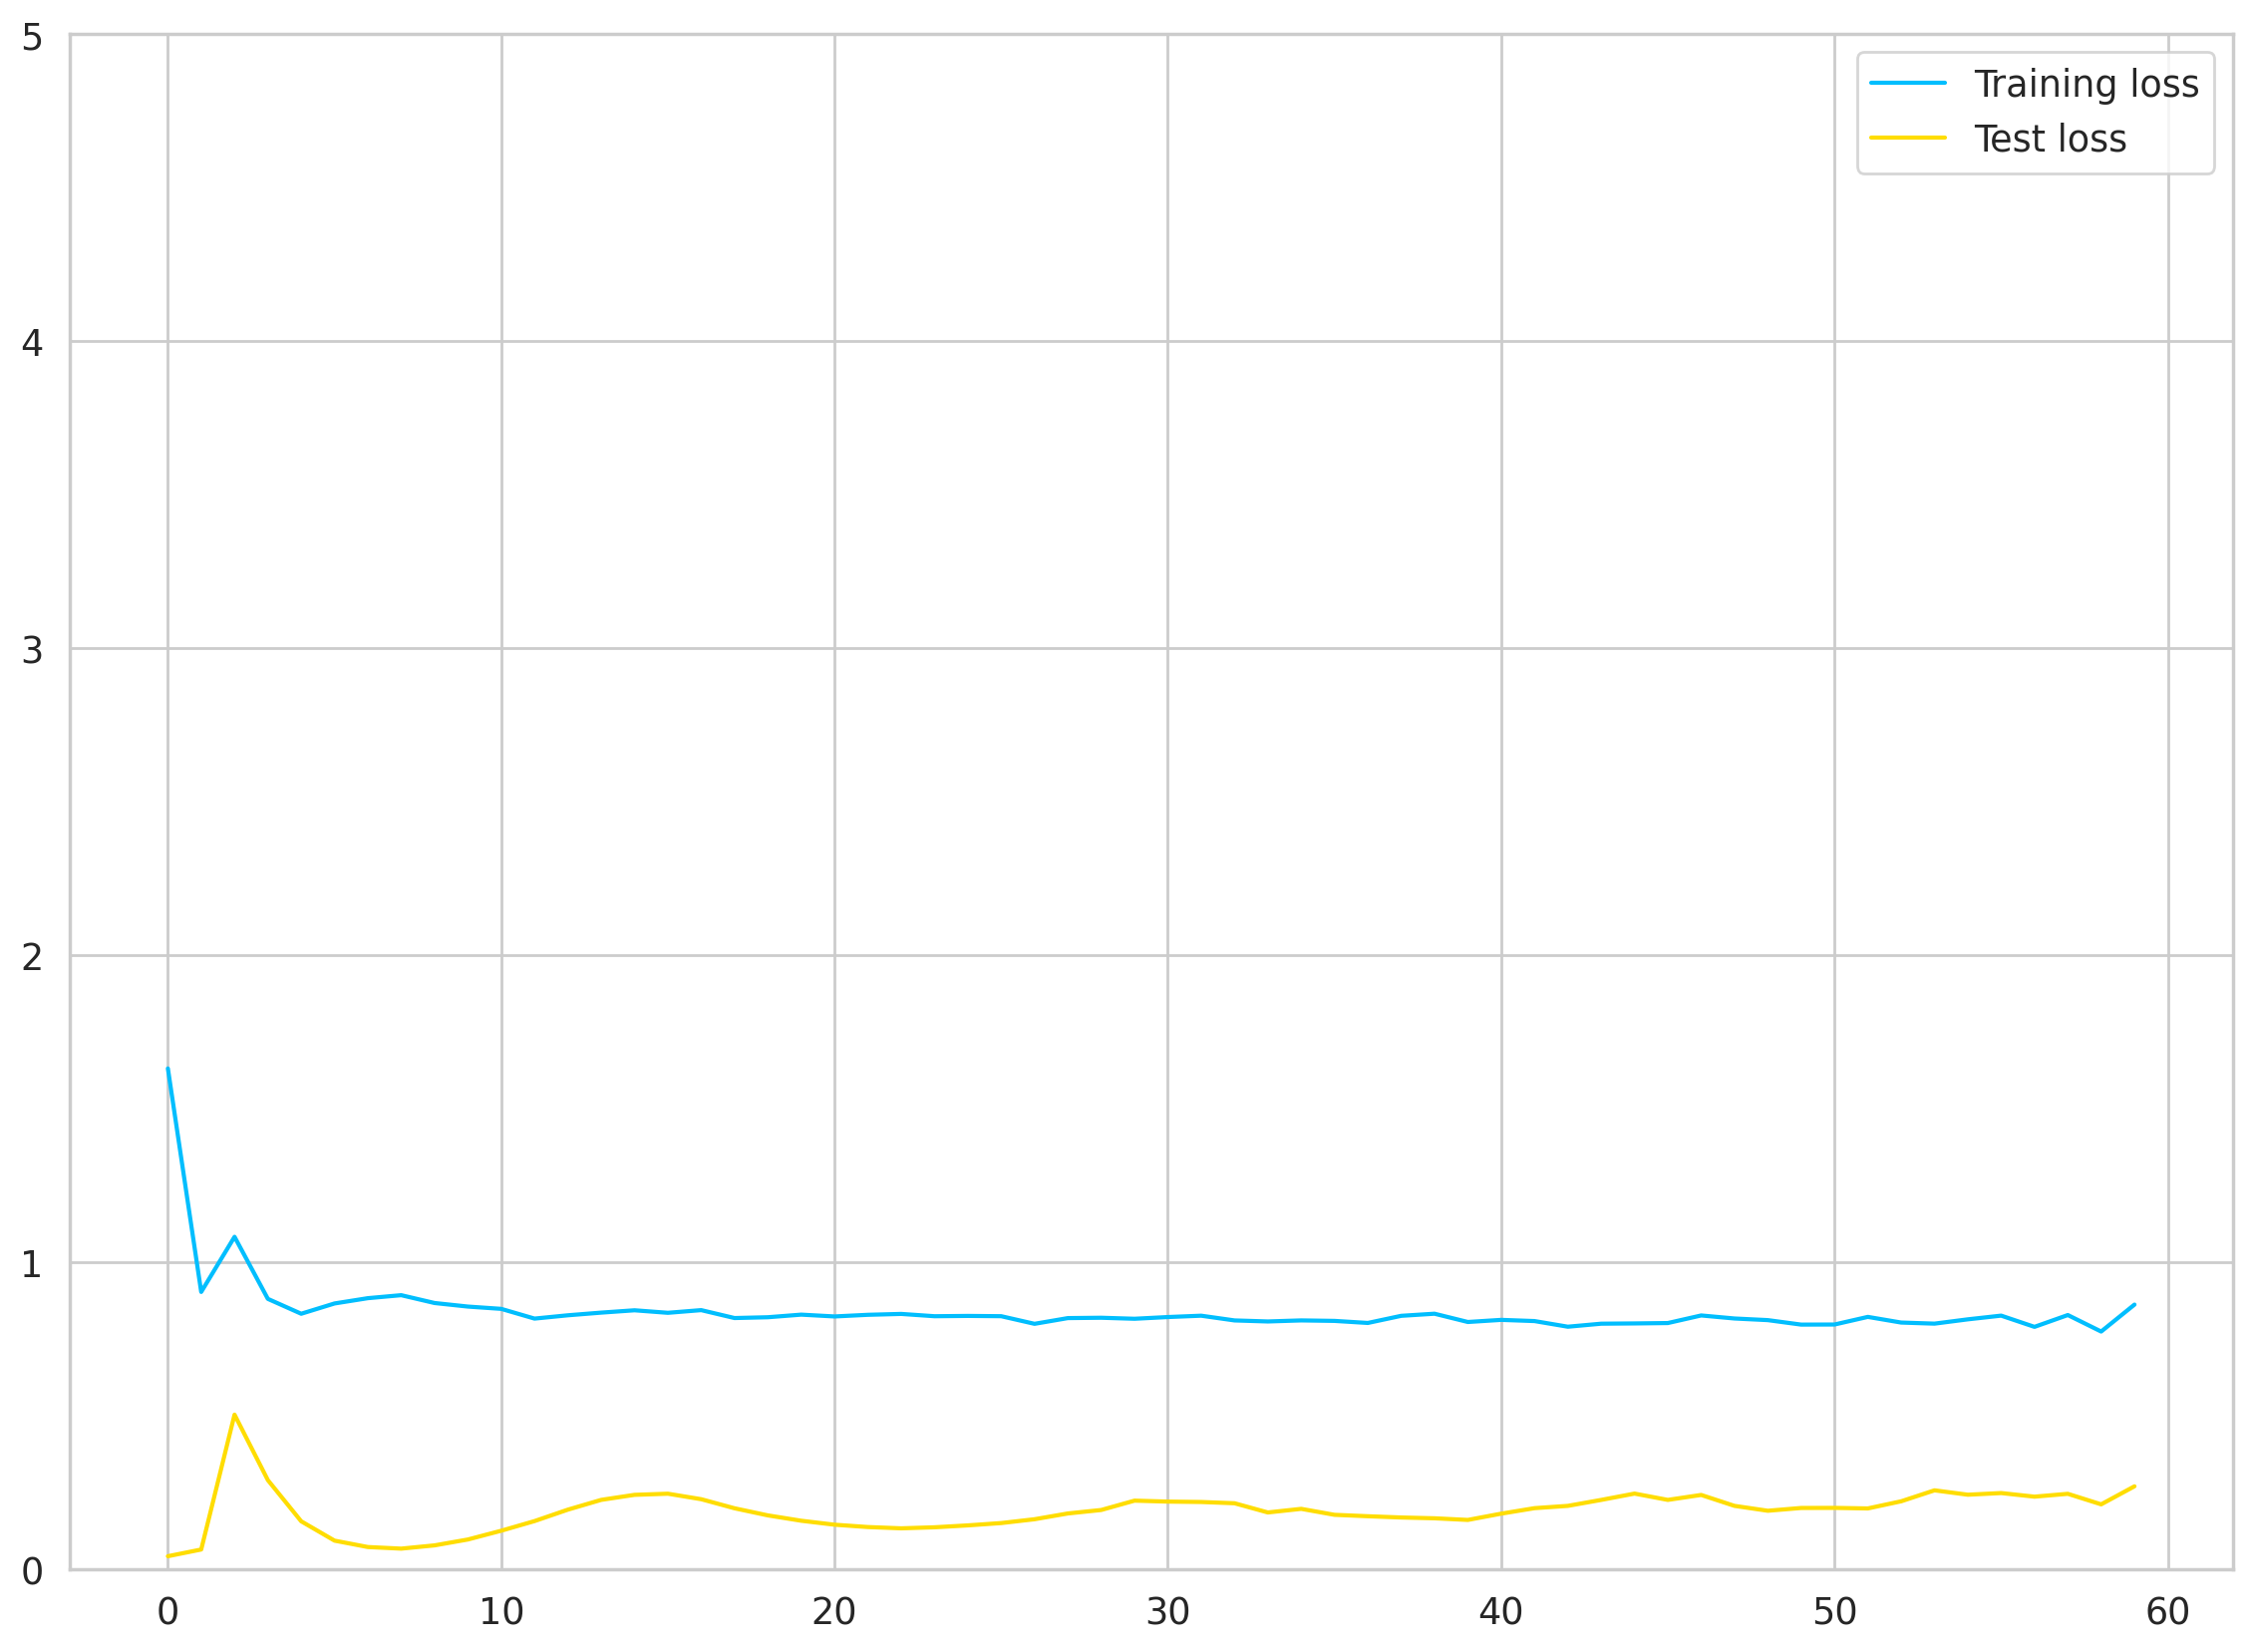

In [30]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 5))
plt.legend();

Заметим, что примерно после 15й эпохи потери перестают убывать. Как Вы думаете, с чем это связано?

Ваш ответ: до 15 эпохи выброс влиял на обучение, затем он был обработан

## Предсказание данных на следующий день

Построенная модель может предсказывать только один день в будущем. Будем использовать прогнозируемые значения в качестве входных данных для прогнозирования следующих дней и таким образом построим множество предсказаний на несколько дней вперёд.

In [31]:
with torch.no_grad():
    test_seq = X_test[:1]
    preds = []
    for _ in range(len(X_test)):
        y_test_pred = model(test_seq)
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)
        new_seq = test_seq.numpy().flatten()
        new_seq = np.append(new_seq , [pred])
        new_seq = new_seq[1:]
        test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

Так как мы изменяли данные при помощи `MinMaxScaler`, то для получения значений в реальном диапазоне, нам необходимо собершить обратные преобразования при помощи функции `scaler.inverse_transform`:

In [32]:
true_cases = scaler.inverse_transform (
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform (
  np.expand_dims(preds, axis=0)
).flatten()

Визуализируем результаты:

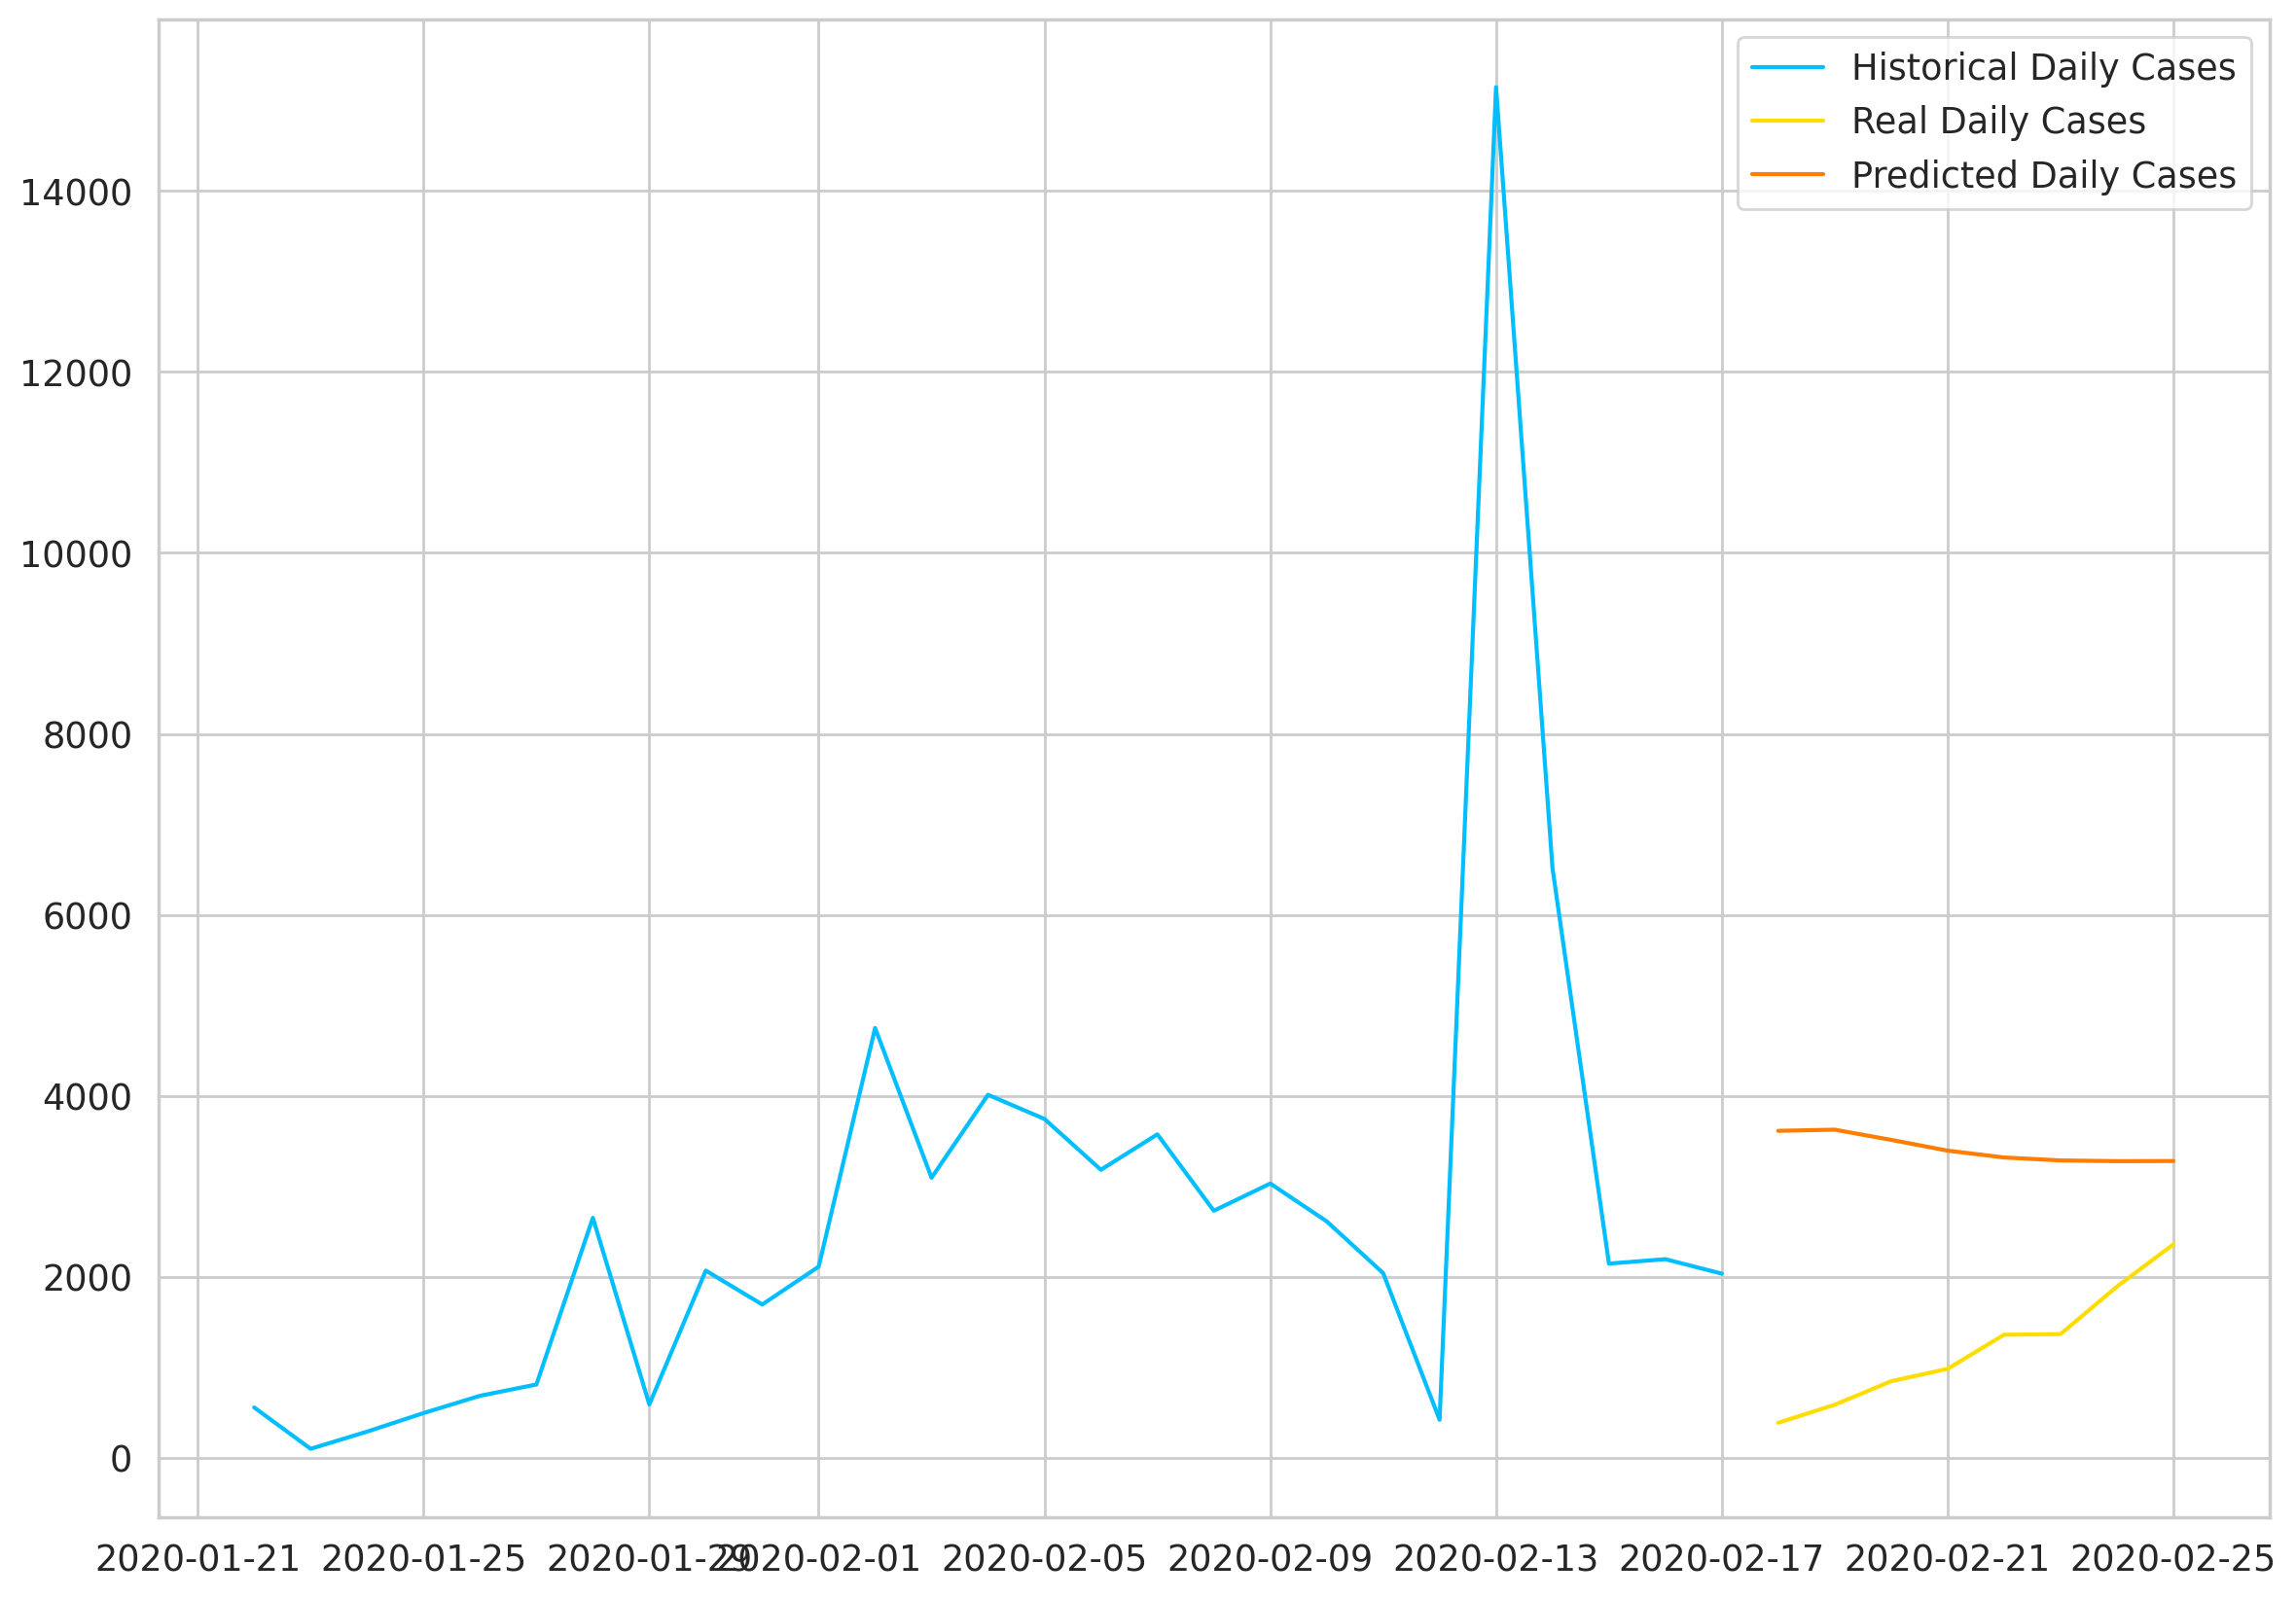

In [33]:
plt.plot(
  daily_cases.index[:len(train_data)],
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)],
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)],
  predicted_cases,
  label='Predicted Daily Cases'
)

plt.legend();

Модель работает не очень хорошо, так как мы импользовали не все данные для пилотного проекта.

## Использование полного набора данных

In [34]:
scaler = MinMaxScaler()

scaler = scaler.fit(np.expand_dims(daily_cases, axis=1))

all_data = scaler.transform(np.expand_dims(daily_cases, axis=1))

all_data.shape

(41, 1)

Первые шаги аналогичные предыдущим построениям:

In [36]:
X_all, y_all = create_sequences(all_data, seq_length)

# Преобразуйте данные в тензоры PyTorch
X_all = torch.from_numpy(X_all).float()
y_all = torch.from_numpy(y_all).float()

model = CoronaVirusPredictor(
  n_features=1,
  n_hidden=512,
  seq_len=seq_length,
  n_layers=2
)
model, train_hist, _ = train_model(model, X_all, y_all)

## Предсказание будущих данных

Используем модель, которая обучена на полном наборе данных, для предсказания следующих 12 дней:

In [37]:
DAYS_TO_PREDICT = 12

with torch.no_grad():
    test_seq = X_all[:1]
    preds = []
    for _ in range(DAYS_TO_PREDICT):
        y_test_pred = model(test_seq)
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)
        new_seq = test_seq.numpy().flatten()
        new_seq = np.append(new_seq, [pred])
        new_seq = new_seq[1:]
        test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

Снова используем функцию `scaler.inverse_transform`:

In [38]:
predicted_cases = scaler.inverse_transform(
    np.expand_dims(preds, axis=0)
).flatten()

Для вывода на экран даты предсказанных результатов, необходимо занести эти данные в множество предсказаний:

In [39]:
daily_cases.index[-1]

Timestamp('2020-03-02 00:00:00')

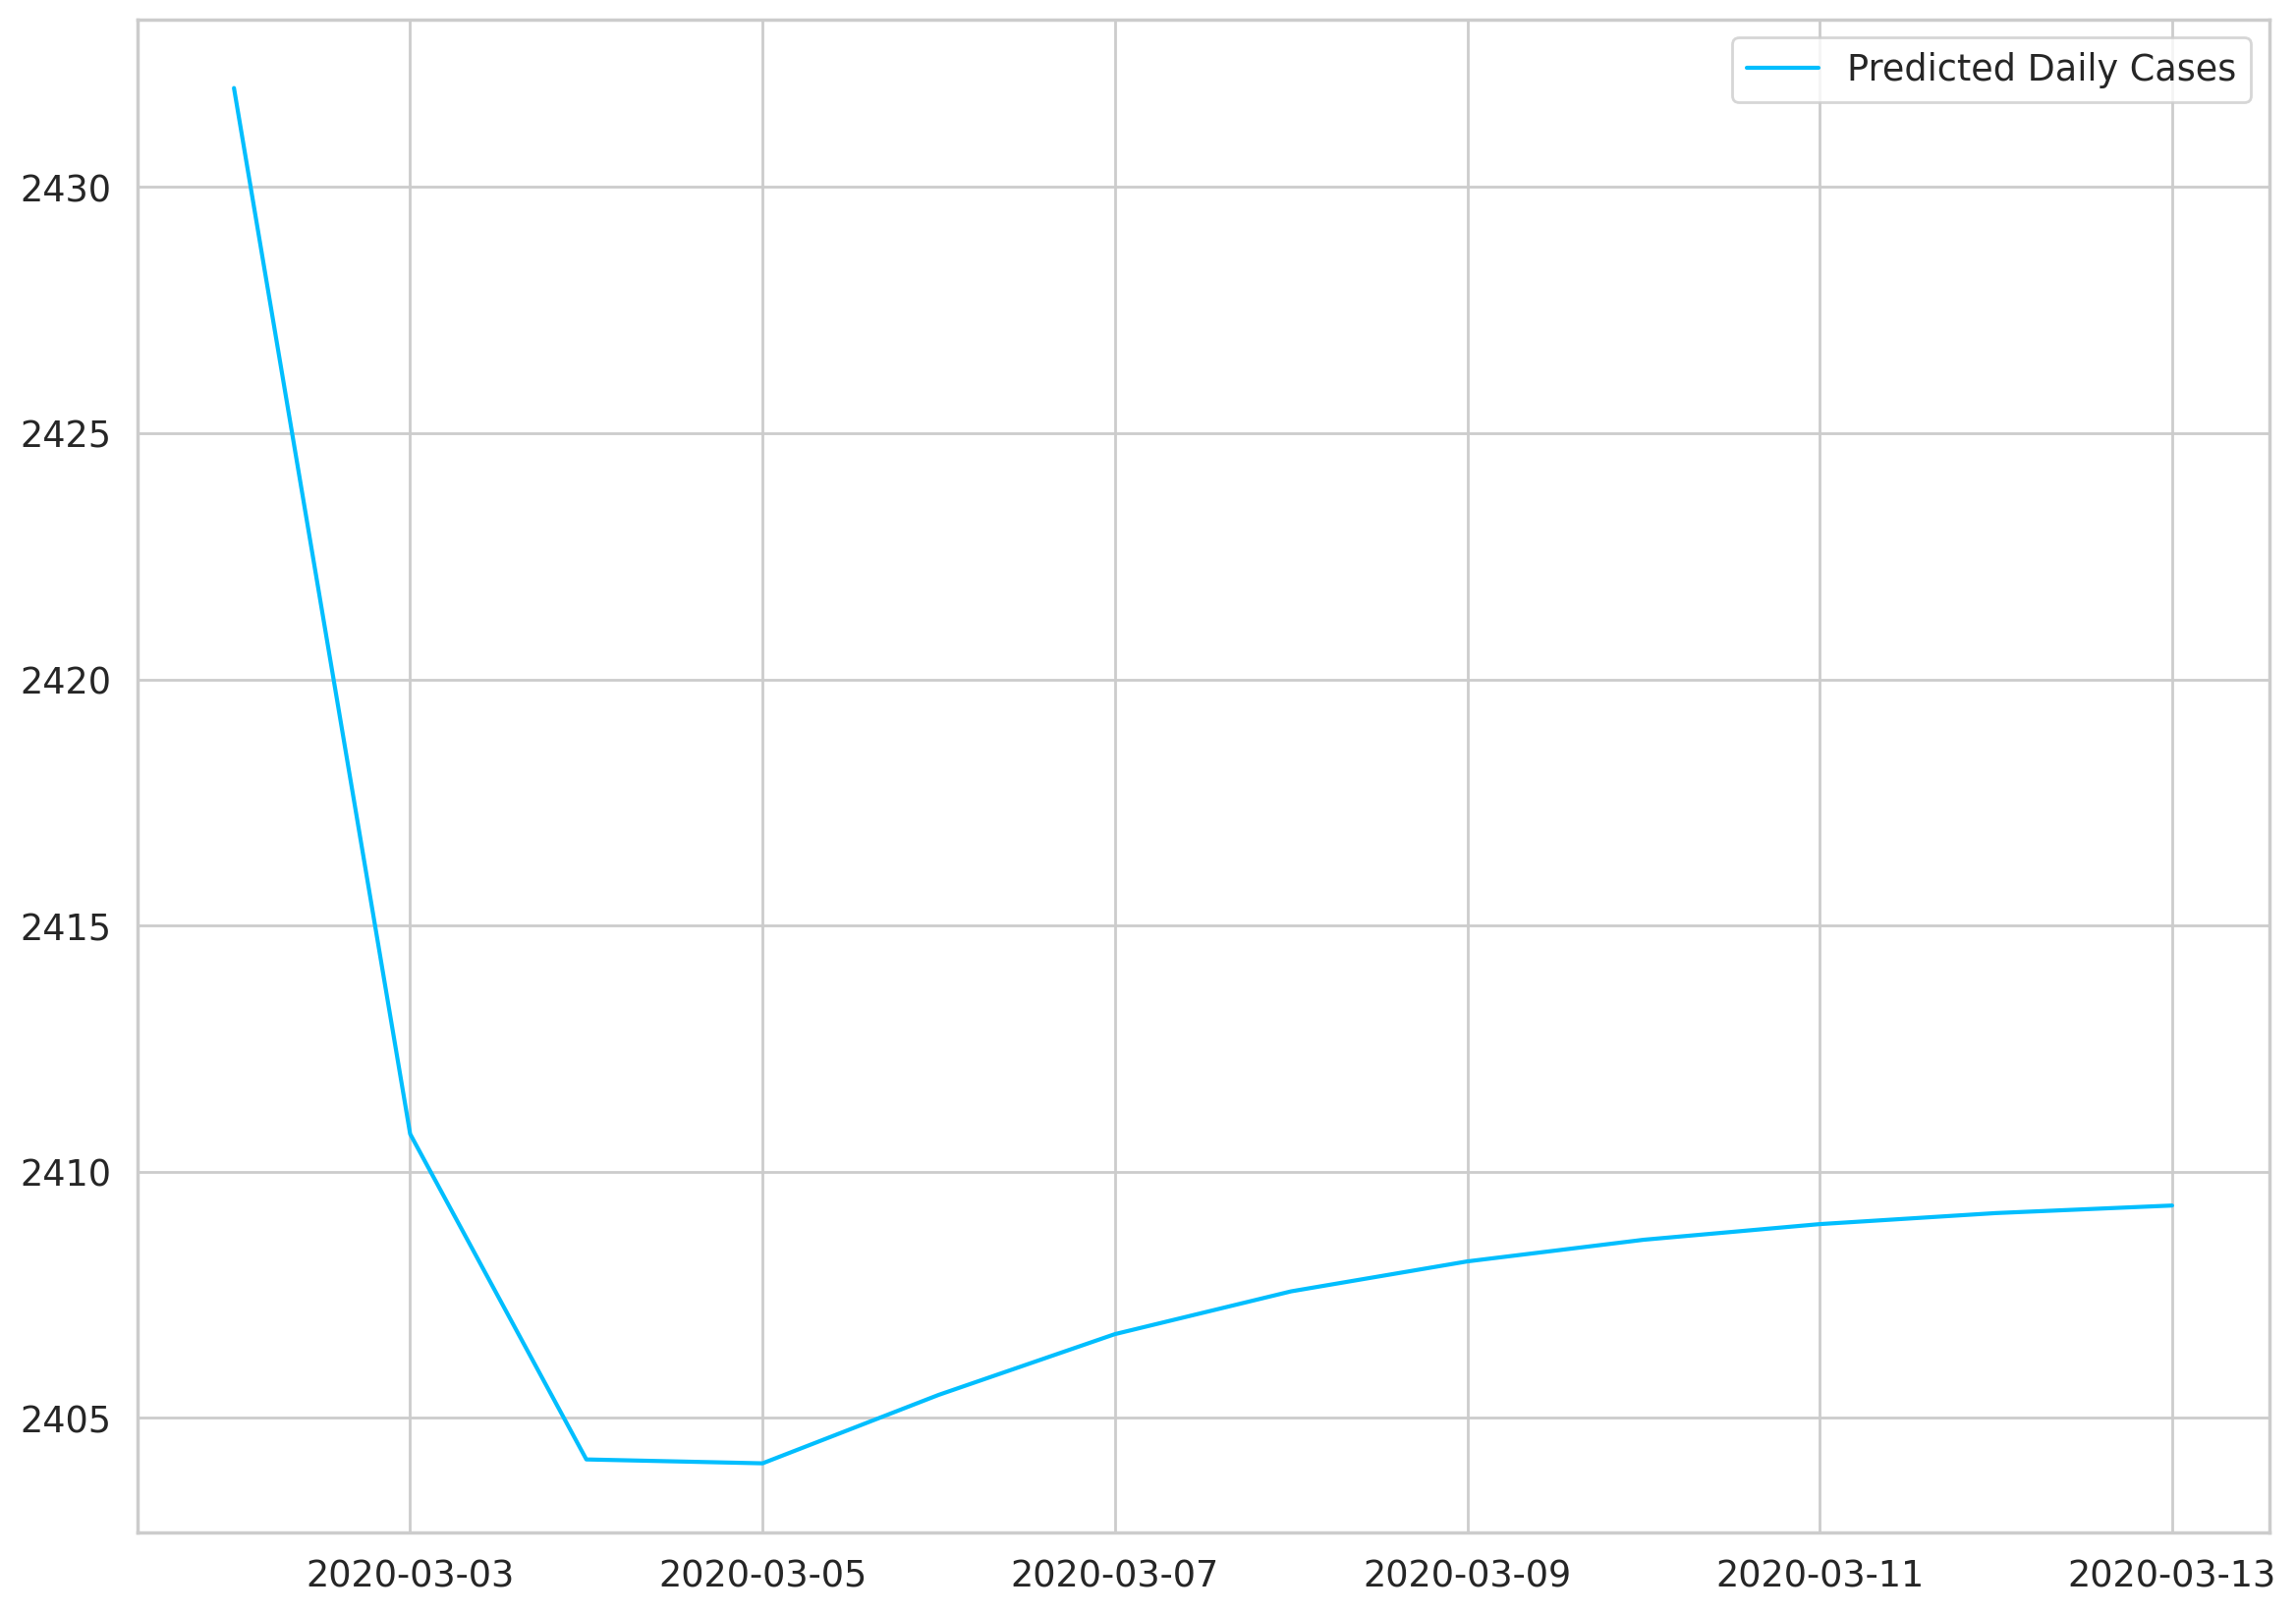

In [41]:
predicted_index = pd.date_range(
  start=daily_cases.index[-1],
  periods=DAYS_TO_PREDICT
)

predicted_cases = pd.Series(
  data=predicted_cases,
  index=predicted_index
)

plt.plot(predicted_cases.index, predicted_cases, label='Predicted Daily Cases')
plt.legend();

Осталось вывести полученные результаты на экран:

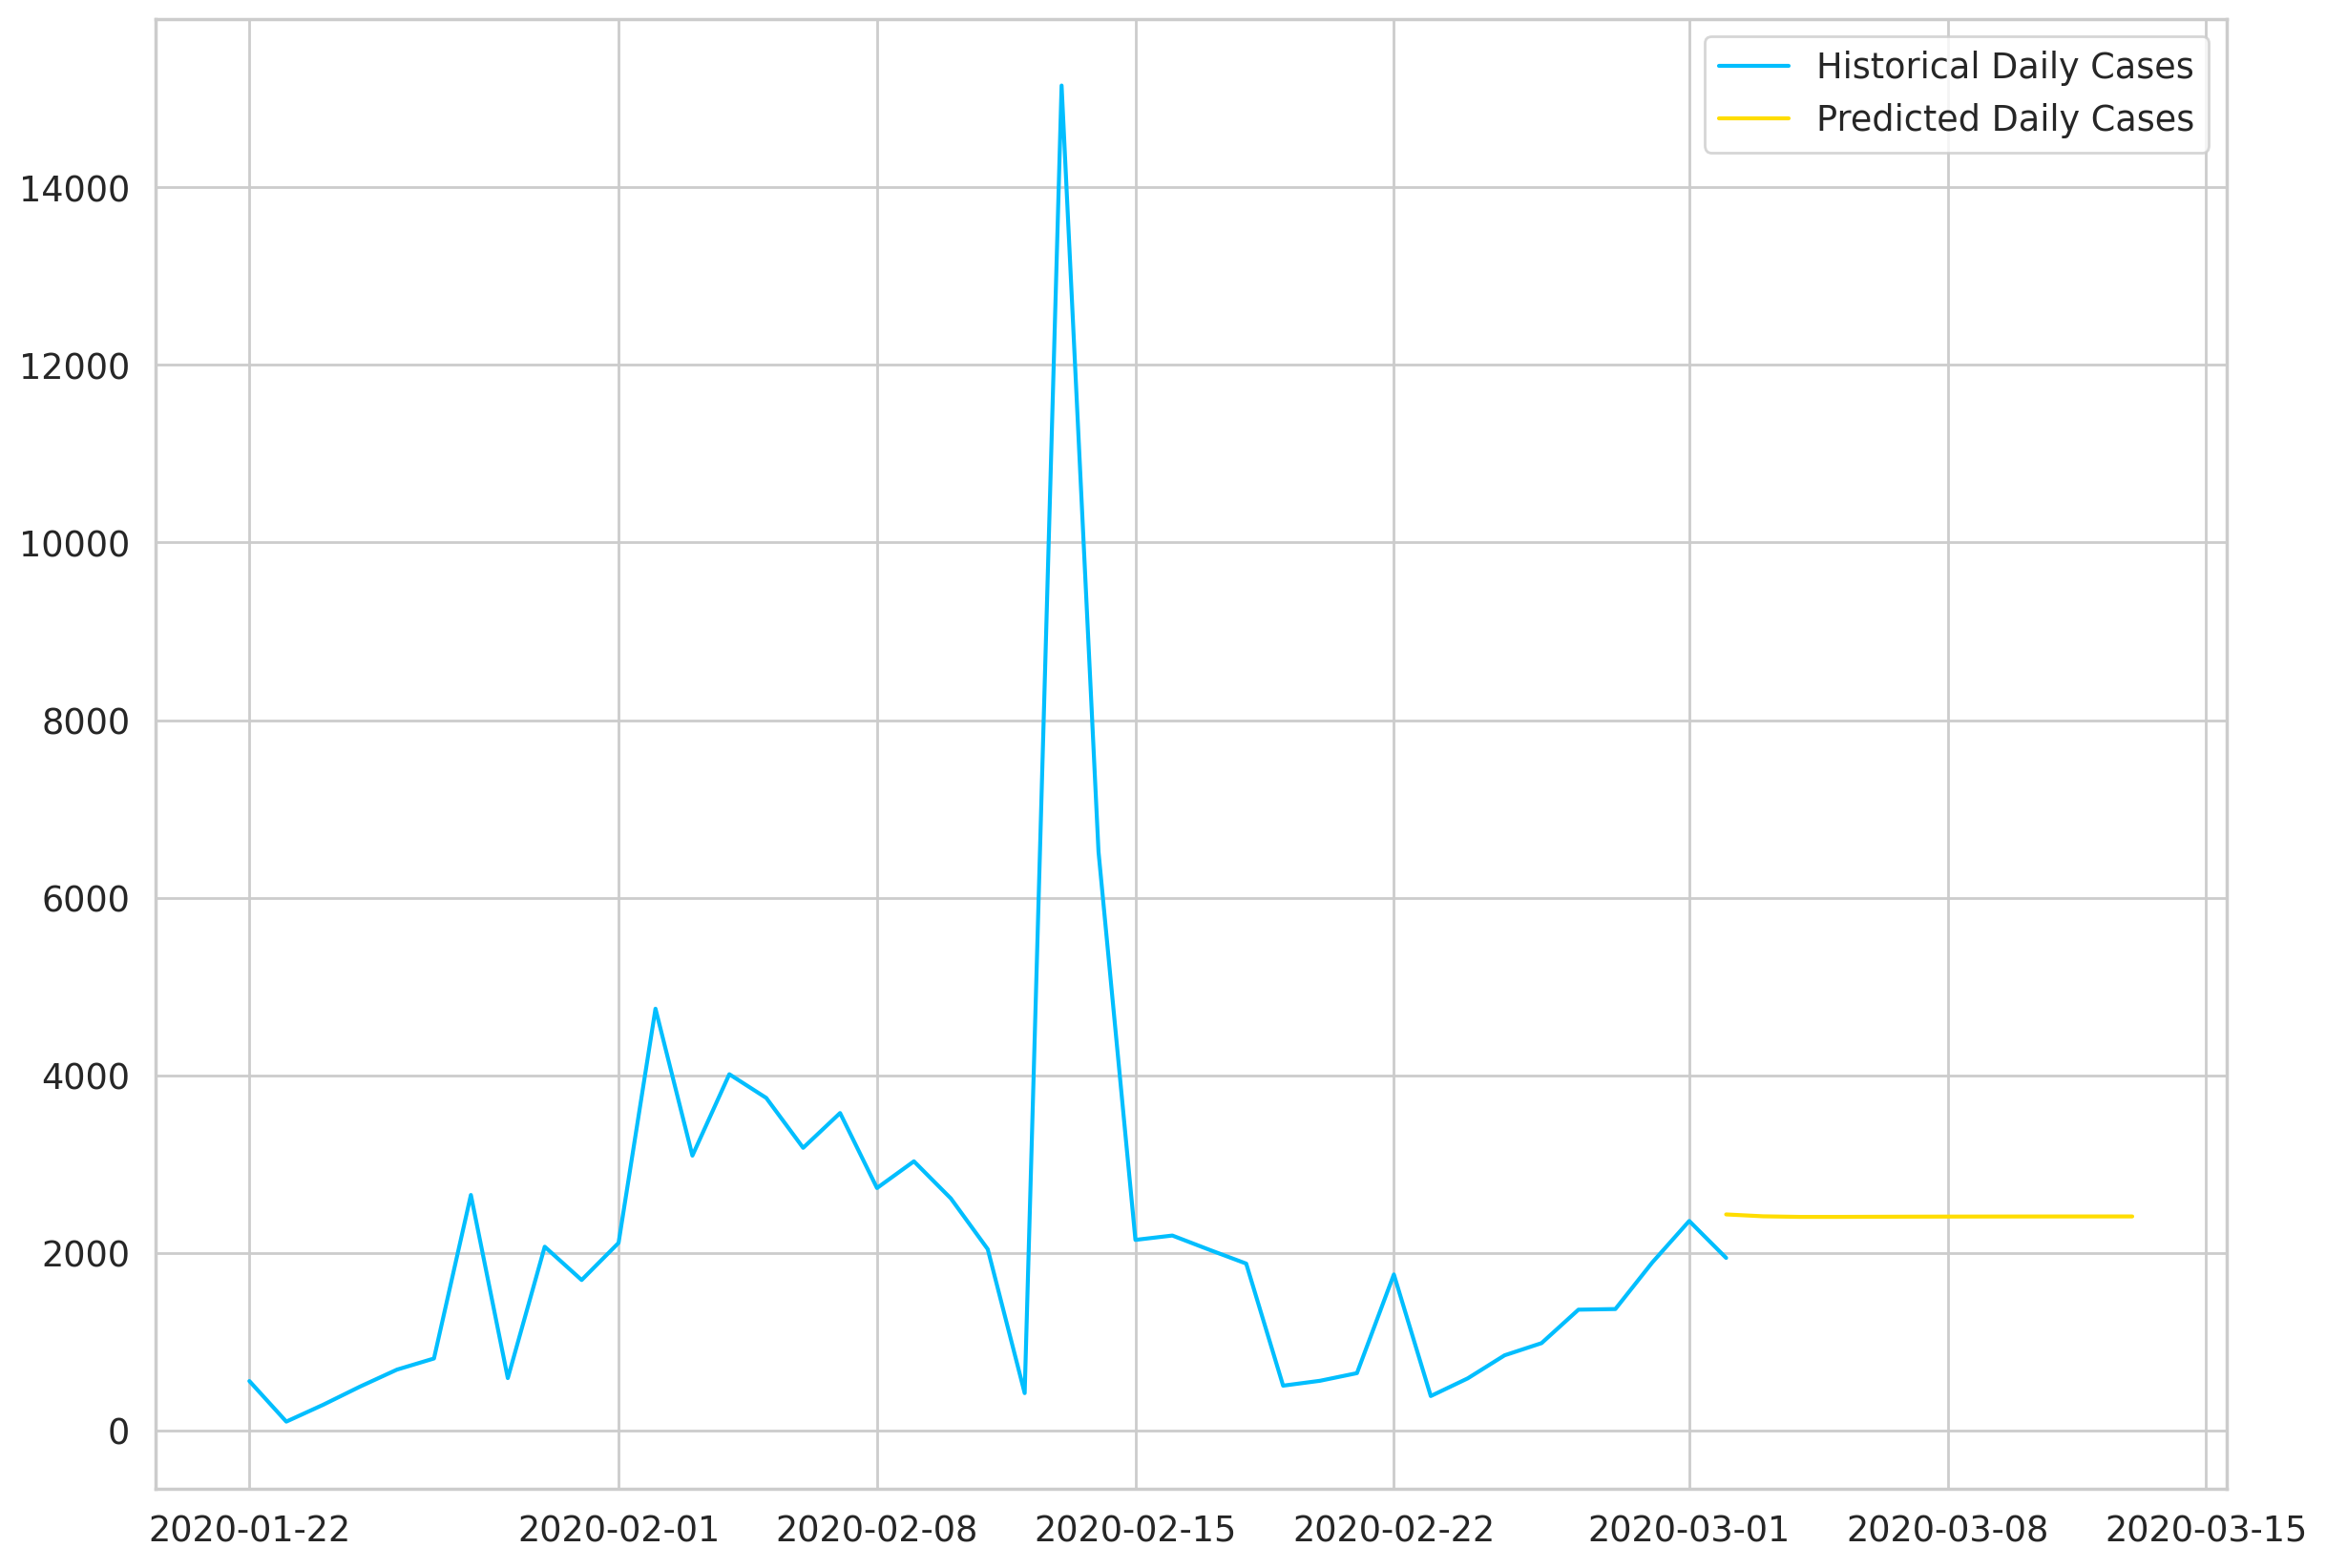

In [42]:
plt.plot(daily_cases, label='Historical Daily Cases')
plt.plot(predicted_cases, label='Predicted Daily Cases')
plt.legend();

Модель получилась позитивно мыслящей, предсказывает результаты выхода на плато, но чем дальше в будущее, тем меньше можно доверять построенным моделям.

## Ссылки на материалы по данной теме:

- [Sequence Models PyTorch Tutorial](https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html)
- [LSTM for time series prediction](https://towardsdatascience.com/lstm-for-time-series-prediction-de8aeb26f2ca)
- [Time Series Prediction using LSTM with PyTorch in Python](https://stackabuse.com/time-series-prediction-using-lstm-with-pytorch-in-python/)
- [Stateful LSTM in Keras](https://philipperemy.github.io/keras-stateful-lstm/)
- [LSTMs for Time Series in PyTorch](https://www.jessicayung.com/lstms-for-time-series-in-pytorch/)
- [Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE](https://github.com/CSSEGISandData/COVID-19)
- [covid-19-analysis](https://github.com/AaronWard/covid-19-analysis)
- [How does Coronavirus compare to Ebola, SARS, etc?](https://www.youtube.com/watch?v=6dDD2tHWWnU)
- [Worldometer COVID-19 Coronavirus Outbreak](https://www.worldometers.info/coronavirus/)
- [How contagious is the Wuhan Coronavirus? (Ro)](https://www.worldometers.info/coronavirus/#repro)
- [Systemic Risk of Pandemic via Novel Pathogens - Coronavirus: A Note](https://www.academia.edu/41743064/Systemic_Risk_of_Pandemic_via_Novel_Pathogens_-_Coronavirus_A_Note)
- [Statistical Consequences of Fat Tails: Real World Preasymptotics, Epistemology, and Applications](https://www.researchers.one/article/2020-01-21)
